How Lending Club gauge credit risk: https://www.lendingclub.com/foliofn/rateDetail.action

# Load Data

In [1]:
import pandas as pd
from ggplot import *

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('data/loan.csv')
# source: https://www.kaggle.com/wendykan/lending-club-loan-data
data_dic = pd.read_excel('data/LCDataDictionary.xlsx')

/Users/Crystal/.Lending-Club-Credit-Risk-Analysis-Project/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [10]:
data_dic

,LoanStatNew,Description
0,User feature (general),NaN
1,addr_state,The state provided by the borrower in the loan...
2,emp_length,Employment length in years. Possible values ar...
3,emp_title,The job title supplied by the Borrower when ap...
4,home_ownership,The home ownership status provided by the borr...
5,member_id,A unique LC assigned Id for the borrower member.
6,zip_code,The first 3 numbers of the zip code provided b...
7,NaN,NaN
8,User feature (financial specific),NaN
9,Income,NaN


# Missing Value Treatment (to be done)

In [4]:
df.sum()

id                                                                28808877305234
member_id                                                         31059884303009
loan_amnt                                                            1.30935e+10
funded_amnt                                                          1.30816e+10
funded_amnt_inv                                                      1.30467e+10
term                            36 months 60 months 36 months 36 months 60 mo...
int_rate                                                             1.17549e+07
installment                                                          3.87534e+08
grade                          BCCCBACEFBCBCBBDCABACBBBBBCDBBAACACBBABBAADDAB...
sub_grade                      B2C4C5C1B5A4C5E1F2B5C3B5C1B1B2D1C4A1B3A1C4B4B3...
home_ownership                 RENTRENTRENTRENTRENTRENTRENTRENTOWNRENTOWNOWNR...
annual_inc                                                           6.65776e+10
verification_status         

# Correlation heatmap

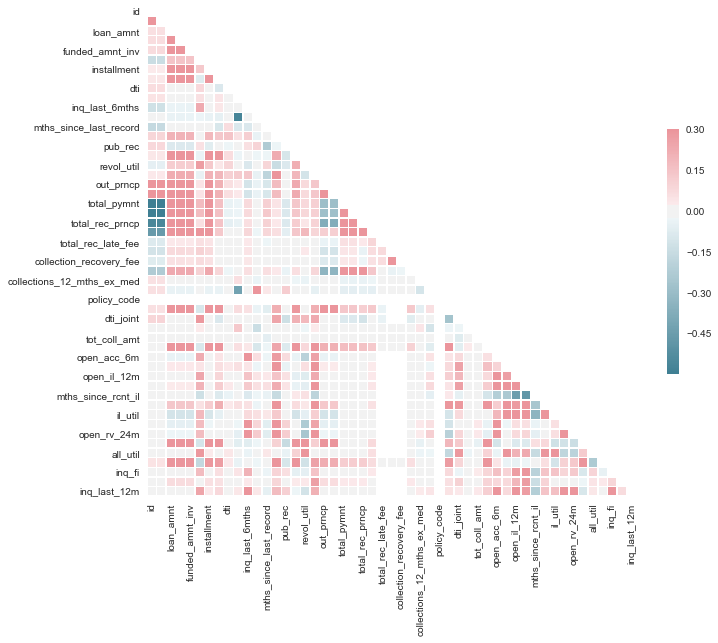

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Visualization using ggplot

#### int_rate: interest rate on the loan

In [9]:
from ggplot import *

In [22]:
df.shape

(887379, 74)

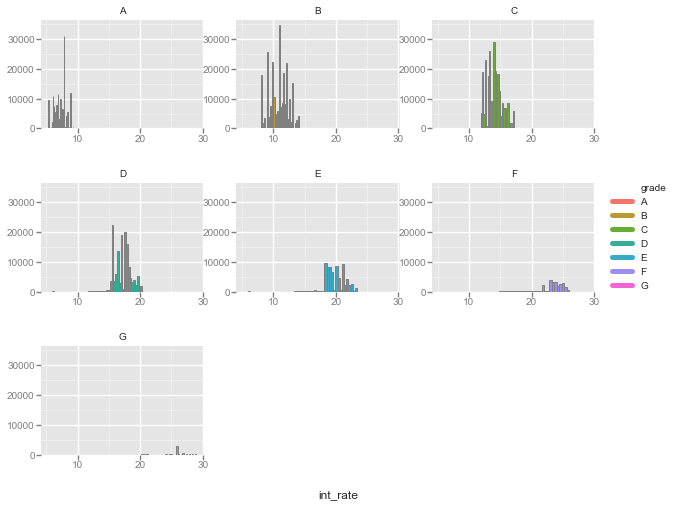

<ggplot: (-9223372036542142527)>

In [29]:
ggplot(df, aes(x='int_rate', fill='grade')) + \
geom_histogram(bins = 50, color = "grey") + \
facet_wrap("grade") 

# Train-test split

In [35]:
# define target variable
y = df['int_rate']
x = df.drop('int_rate', axis = 1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)